In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns # Guide: https://seaborn.pydata.org/tutorial/introduction.html
sns.set_theme(style="darkgrid")

rng = np.random.default_rng()

In [2]:
def func(x, yvals):
    y0, y1 = yvals
    f0= y1
    f1 = -g*np.sin(y0)/l
    return np.array ([f0, f1])

def rk4_func(func, a, b, n, yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))

    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*func(x, yvals)
        k1 = h*func(x+h/2, yvals+k0/2)
        k2 = h*func(x+h/2, yvals+k1/2)
        k3 = h*func(x+h, yvals+k2)
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

if __name__ == '__main__':
    g = 9.8
    l = 1
    a, b, n = 0, 10, 1_000
    yinits = np.array([0.0872665, 0])
    xs, ys = rk4_func(func,a,b,n,yinits)
    print(ys)

[[ 0.0872665   0.        ]
 [ 0.08722371 -0.00854842]
 [ 0.08709539 -0.01708848]
 ...
 [ 0.08572089  0.05115629]
 [ 0.08619085  0.04273388]
 [ 0.08657629  0.03426966]]


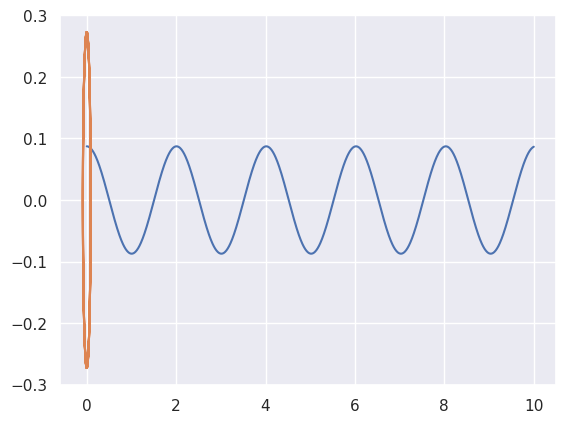

In [3]:
plt.plot(xs, ys[:,0])
plt.plot(ys[:,0], ys[:,1])

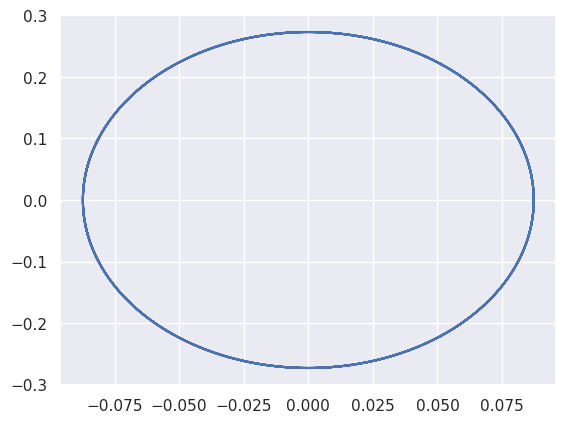

In [4]:
plt.plot(ys[:,0], ys[:,1])

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_831314/2270108744.py:35: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel(f'$\mu$')
/tmp/ipykernel_831314/2270108744.py:48: SyntaxWarning: invalid escape sequence '\m'
  plt.suptitle(f"van der Pol oscillator $\mu = {mu1}$", x=0.55, y=1.05)


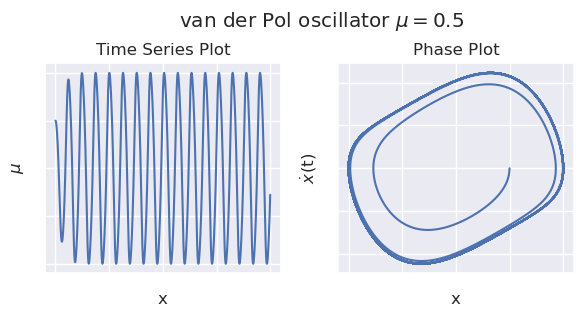

In [5]:
def fs(x,yvals):
    y0, y1 = yvals
    f0 = y1
    f1 = mu*(1-y0**2)*y1 - y0
    return np.array([f0, f1])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

mu1 = 0.5
mu = mu1
a, b, n = 0, 100, 10_000
yinits = np.array([1., 0])
xs, ys = rk4gen(fs,a,b,n,yinits)

fig, axs = plt.subplots(1, 2, figsize=(6 , 3))
##
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot")
axs[0].set_xlabel("x")
axs[0].set_ylabel(f'$\mu$')
    ##
    
axs[1].plot(ys[:,0], ys[:,1])
axs[1].set_title(f"Phase Plot")
axs[1].set_xlabel("x")
axs[1].set_ylabel(r"$\dot x$(t)")

## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle(f"van der Pol oscillator $\mu = {mu1}$", x=0.55, y=1.05)
plt.savefig("Nov19 Mu = 0.5.png")

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:60: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:60: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_831314/2561800047.py:35: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel(f'$\mu$')
/tmp/ipykernel_831314/2561800047.py:60: SyntaxWarning: invalid escape sequence '\m'
  plt.suptitle(f"van der Pol oscillator $\mu = {mu1}$", x=0.55, y=1.05)


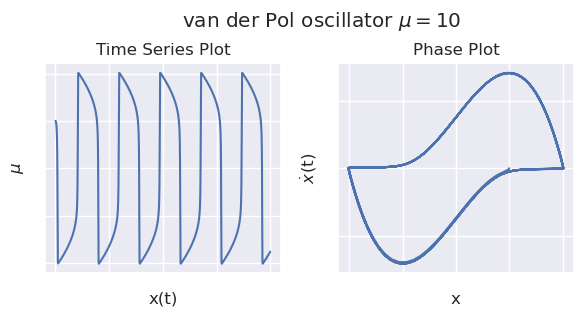

In [6]:
def fs(x,yvals):
    y0, y1 = yvals
    f0 = y1
    f1 = mu*(1-y0**2)*y1 - y0
    return np.array([f0, f1])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

mu1 = 10
mu = mu1
a, b, n = 0, 100, 10_000
yinits = np.array([1., 0])
xs, ys = rk4gen(fs,a,b,n,yinits)

fig, axs = plt.subplots(1, 2, figsize=(6 , 3))
##
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot")
axs[0].set_xlabel("x(t)")
axs[0].set_ylabel(f'$\mu$')
    ##
    
axs[1].plot(ys[:,0], ys[:,1])
axs[1].set_title(f"Phase Plot")
axs[1].set_xlabel("x")
axs[1].set_ylabel(r"$\dot x$(t)")

# mu2 = 50
# mu = mu2
# a, b, n = 0, 100, 10_000
# yinits = np.array([1., 0])
# xs, ys = rk4gen(fs,a,b,n,yinits)
# axs[2].plot(ys[:,0], ys[:,1])
# axs[2].set_title(f"Phase Plot $\mu = {mu2}$")
# axs[2].set_xlabel("x(t)")
# axs[2].set_ylabel(r"$ \dot x$(t)")


    
## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle(f"van der Pol oscillator $\mu = {mu1}$", x=0.55, y=1.05)
plt.savefig("Nov19 Mu = 10.png")

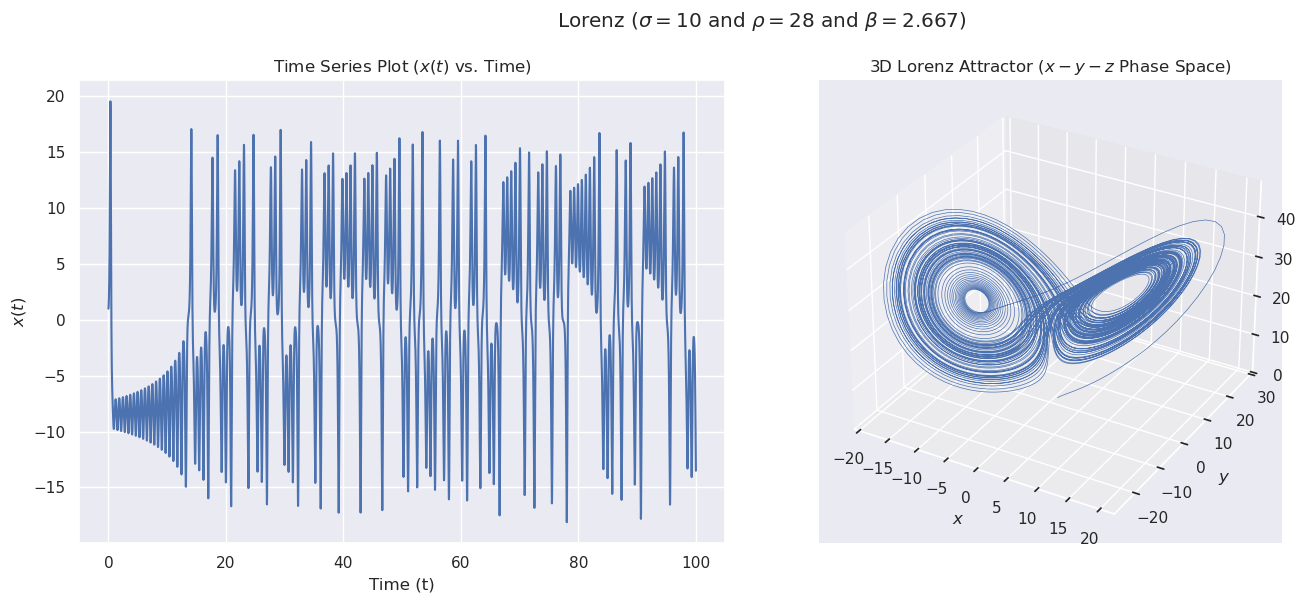

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
sigma = 10
rho = 28
beta = 2.667

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = sigma*(y1 - y0)
    f1 = y0*(rho-y2) - y1
    f2 = y0*y1 - beta*y2
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([1., 1., 1.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

## 2. 3D Attractor Plot (Right Subplot: axs[1])

# We need to explicitly convert the standard subplot axs[1] into a 3D projection
# We must delete the existing 2D axis and replace it with a 3D one.
# An easier way is to define the figure and axes from scratch using subplot:
plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Lorenz Attractor ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Lorenz ($\\sigma = {sigma}$ and $\\rho = {rho}$ and $\\beta = {beta}$)", x=0.55, y=1.)
plt.savefig("Nov19 Lorenz 1.png")
plt.show()

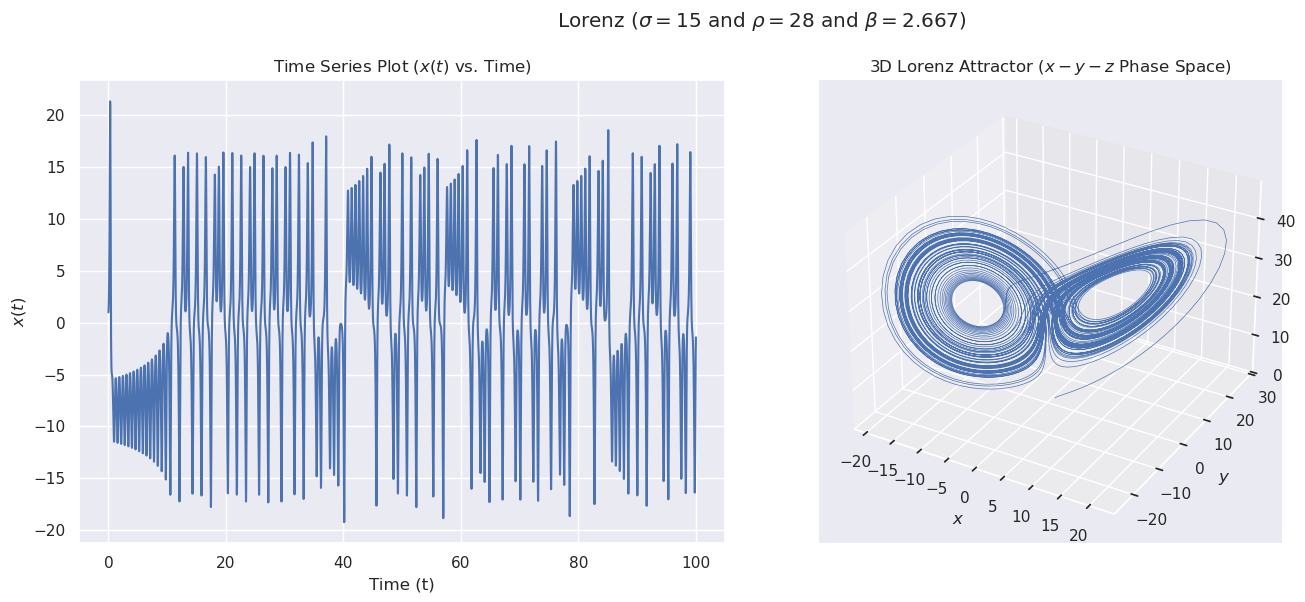

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
sigma = 15
rho = 28
beta = 2.667

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = sigma*(y1 - y0)
    f1 = y0*(rho-y2) - y1
    f2 = y0*y1 - beta*y2
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([1., 1., 1.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

## 2. 3D Attractor Plot (Right Subplot: axs[1])

# We need to explicitly convert the standard subplot axs[1] into a 3D projection
# We must delete the existing 2D axis and replace it with a 3D one.
# An easier way is to define the figure and axes from scratch using subplot:
plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Lorenz Attractor ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Lorenz ($\\sigma = {sigma}$ and $\\rho = {rho}$ and $\\beta = {beta}$)", x=0.55, y=1.)
plt.savefig("Nov19 Lorenz 2.png")
plt.show()

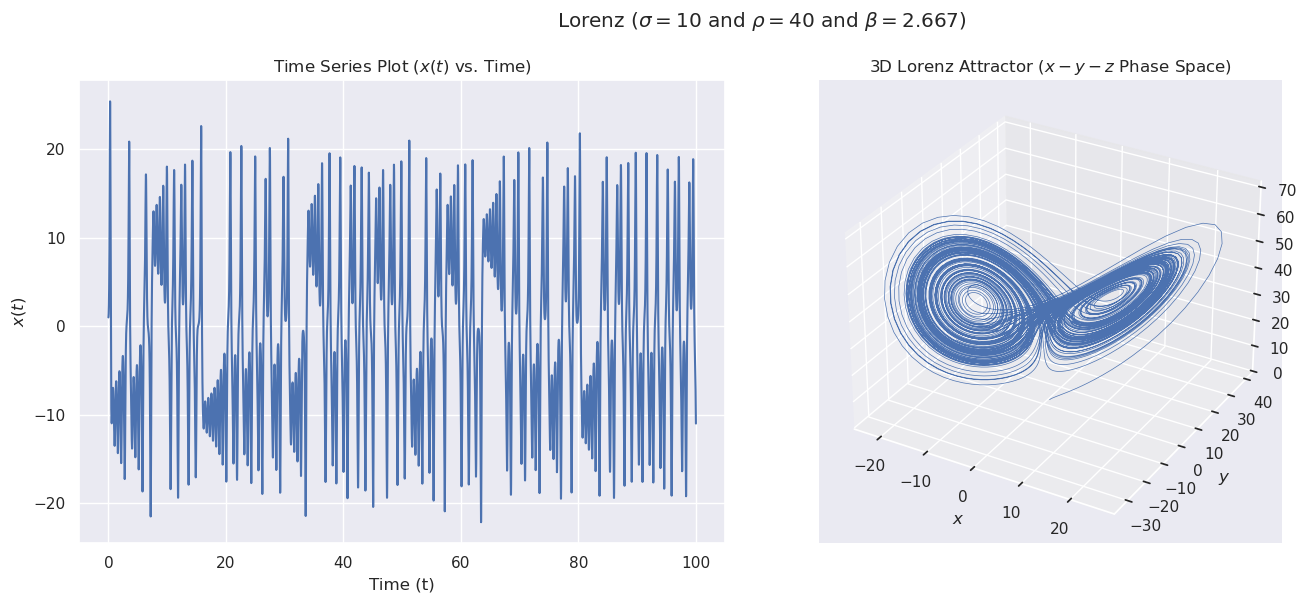

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
sigma = 10
rho = 40
beta = 2.667

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = sigma*(y1 - y0)
    f1 = y0*(rho-y2) - y1
    f2 = y0*y1 - beta*y2
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([1., 1., 1.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

## 2. 3D Attractor Plot (Right Subplot: axs[1])

# We need to explicitly convert the standard subplot axs[1] into a 3D projection
# We must delete the existing 2D axis and replace it with a 3D one.
# An easier way is to define the figure and axes from scratch using subplot:
plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Lorenz Attractor ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Lorenz ($\\sigma = {sigma}$ and $\\rho = {rho}$ and $\\beta = {beta}$)", x=0.55, y=1.)
plt.savefig("Nov19 Lorenz 3.png")
plt.show()

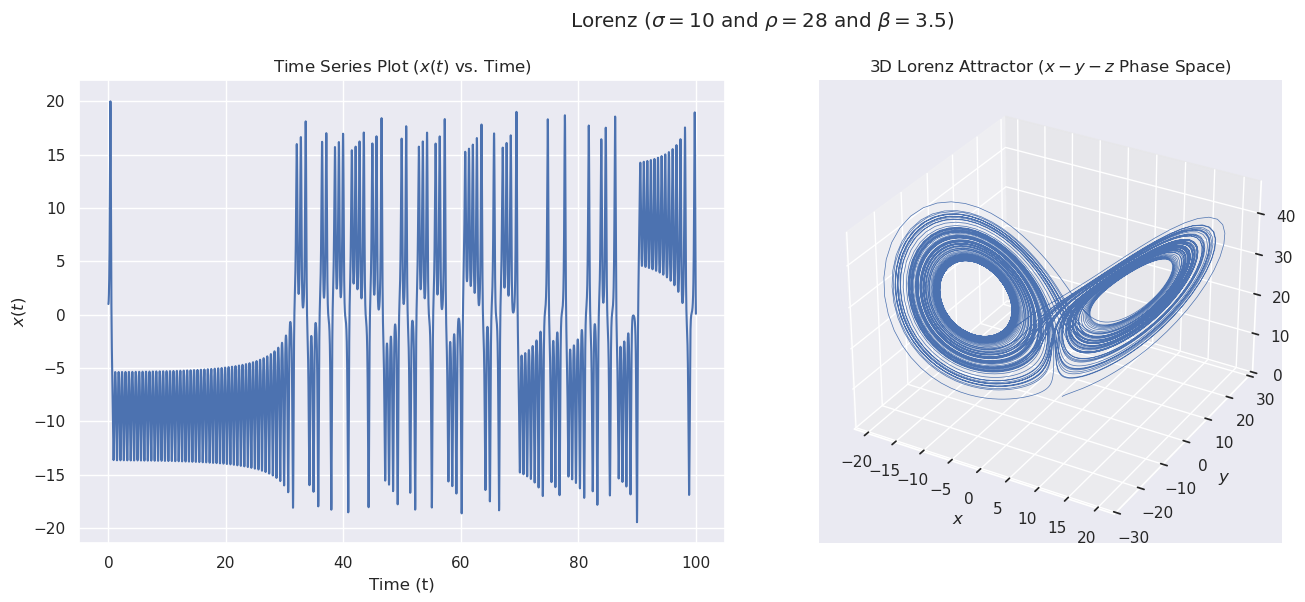

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
sigma = 10
rho = 28
beta = 3.5

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = sigma*(y1 - y0)
    f1 = y0*(rho-y2) - y1
    f2 = y0*y1 - beta*y2
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([1., 1., 1.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

## 2. 3D Attractor Plot (Right Subplot: axs[1])

# We need to explicitly convert the standard subplot axs[1] into a 3D projection
# We must delete the existing 2D axis and replace it with a 3D one.
# An easier way is to define the figure and axes from scratch using subplot:
plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Lorenz Attractor ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Lorenz ($\\sigma = {sigma}$ and $\\rho = {rho}$ and $\\beta = {beta}$)", x=0.55, y=1.)
plt.savefig("Nov19 Lorenz 4.png")
plt.show()

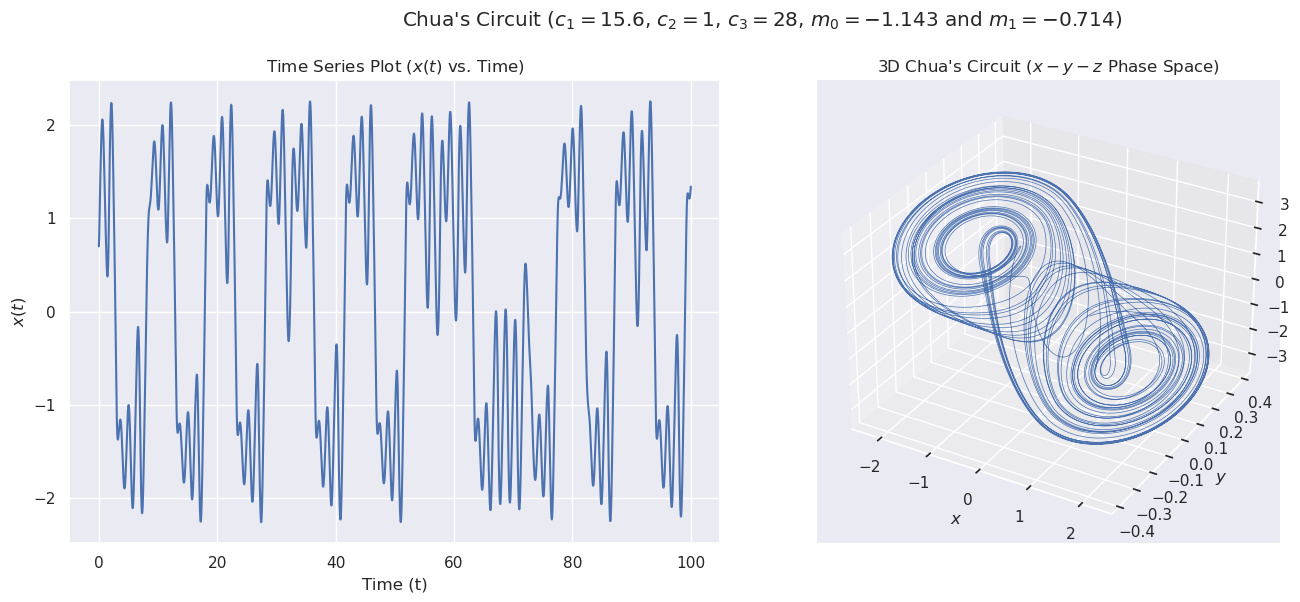

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
c1 = 15.6
c2 = 1
c3 = 28
m0 = -1.143
m1 = -0.714

def func(m0,m1,y0):
    return m1*y0 + (m0-m1)*(np.abs(y0+1)-np.abs(y0-1))/2

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = c1 *(y1-y0-func(m0, m1, y0))
    f1 = c2*(y0-y1+y2)
    f2 = -c3*y1
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([0.7, 0., 0.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

## 2. 3D Attractor Plot (Right Subplot: axs[1])

# We need to explicitly convert the standard subplot axs[1] into a 3D projection
# We must delete the existing 2D axis and replace it with a 3D one.
# An easier way is to define the figure and axes from scratch using subplot:
plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Chua's Circuit ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Chua's Circuit ($c_1 = {c1}$, $c_2 = {c2}$, $c_3 = {c3}$, $m_0 = {m0}$ and $m_1 = {m1}$)", x=0.55, y=1.)
plt.savefig("Nov19 Chua 1.png")
plt.show()

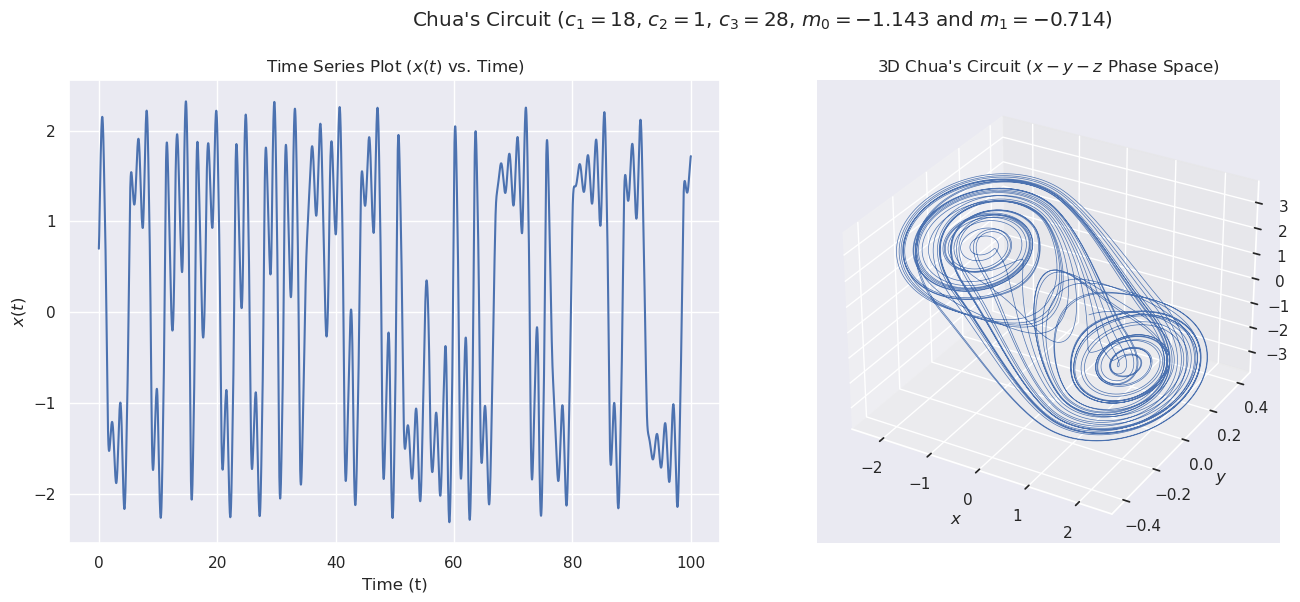

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
c1 = 18
c2 = 1
c3 = 28
m0 = -1.143
m1 = -0.714

def func(m0,m1,y0):
    return m1*y0 + (m0-m1)*(np.abs(y0+1)-np.abs(y0-1))/2

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = c1 *(y1-y0-func(m0, m1, y0))
    f1 = c2*(y0-y1+y2)
    f2 = -c3*y1
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([0.7, 0., 0.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

## 2. 3D Attractor Plot (Right Subplot: axs[1])

# We need to explicitly convert the standard subplot axs[1] into a 3D projection
# We must delete the existing 2D axis and replace it with a 3D one.
# An easier way is to define the figure and axes from scratch using subplot:
plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Chua's Circuit ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Chua's Circuit ($c_1 = {c1}$, $c_2 = {c2}$, $c_3 = {c3}$, $m_0 = {m0}$ and $m_1 = {m1}$)", x=0.55, y=1.)
plt.savefig("Nov19 Chua 2.png")
plt.show()

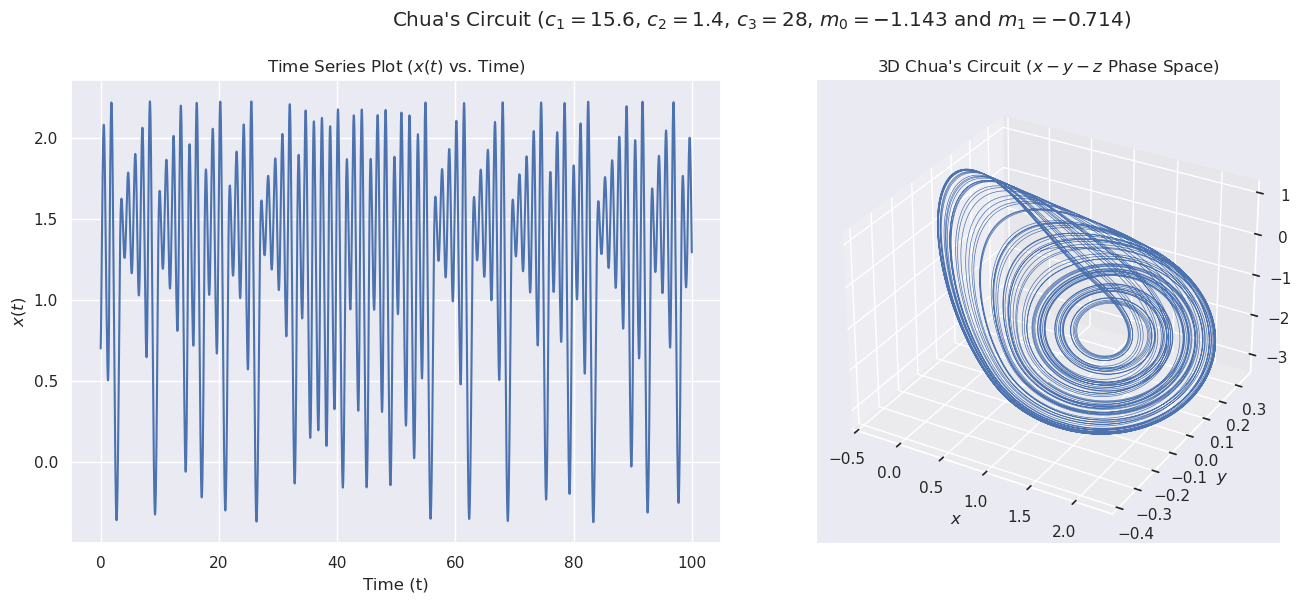

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
c1 = 15.6
c2 = 1.4
c3 = 28
m0 = -1.143
m1 = -0.714

def func(m0,m1,y0):
    return m1*y0 + (m0-m1)*(np.abs(y0+1)-np.abs(y0-1))/2

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = c1 *(y1-y0-func(m0, m1, y0))
    f1 = c2*(y0-y1+y2)
    f2 = -c3*y1
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([0.7, 0., 0.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Chua's Circuit ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Chua's Circuit ($c_1 = {c1}$, $c_2 = {c2}$, $c_3 = {c3}$, $m_0 = {m0}$ and $m_1 = {m1}$)", x=0.55, y=1.)
plt.savefig("Nov19 Chua 3.png")
plt.show()

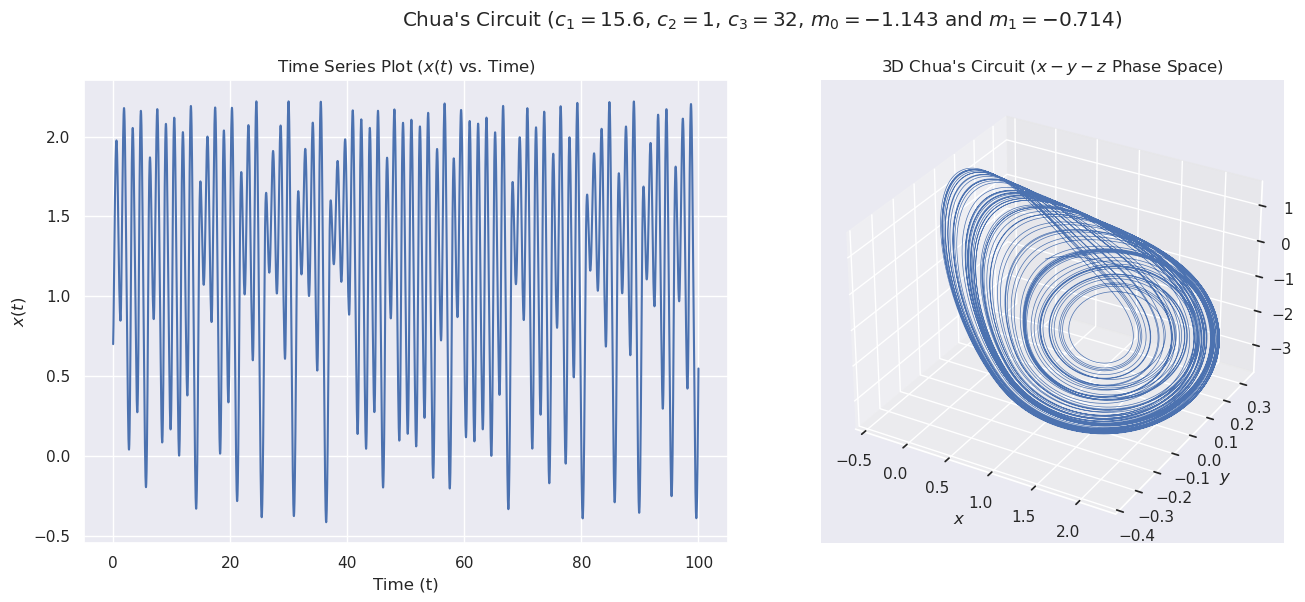

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
c1 = 15.6
c2 = 1
c3 = 32
m0 = -1.143
m1 = -0.714

def func(m0,m1,y0):
    return m1*y0 + (m0-m1)*(np.abs(y0+1)-np.abs(y0-1))/2

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = c1 *(y1-y0-func(m0, m1, y0))
    f1 = c2*(y0-y1+y2)
    f2 = -c3*y1
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([0.7, 0., 0.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Chua's Circuit ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Chua's Circuit ($c_1 = {c1}$, $c_2 = {c2}$, $c_3 = {c3}$, $m_0 = {m0}$ and $m_1 = {m1}$)", x=0.55, y=1.)
plt.savefig("Nov19 Chua 4.png")
plt.show()

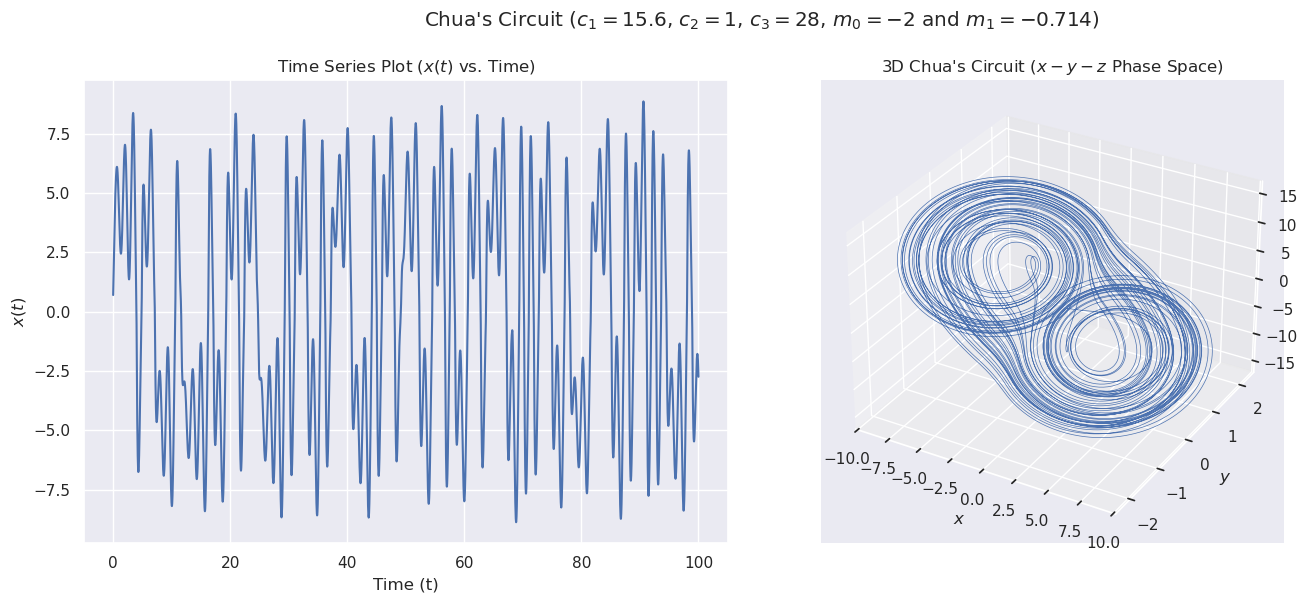

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
c1 = 15.6
c2 = 1
c3 = 28
m0 = -2
m1 = -0.714

def func(m0,m1,y0):
    return m1*y0 + (m0-m1)*(np.abs(y0+1)-np.abs(y0-1))/2

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = c1 *(y1-y0-func(m0, m1, y0))
    f1 = c2*(y0-y1+y2)
    f2 = -c3*y1
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([0.7, 0., 0.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Chua's Circuit ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Chua's Circuit ($c_1 = {c1}$, $c_2 = {c2}$, $c_3 = {c3}$, $m_0 = {m0}$ and $m_1 = {m1}$)", x=0.55, y=1.)
plt.savefig("Nov19 Chua 5.png")
plt.show()

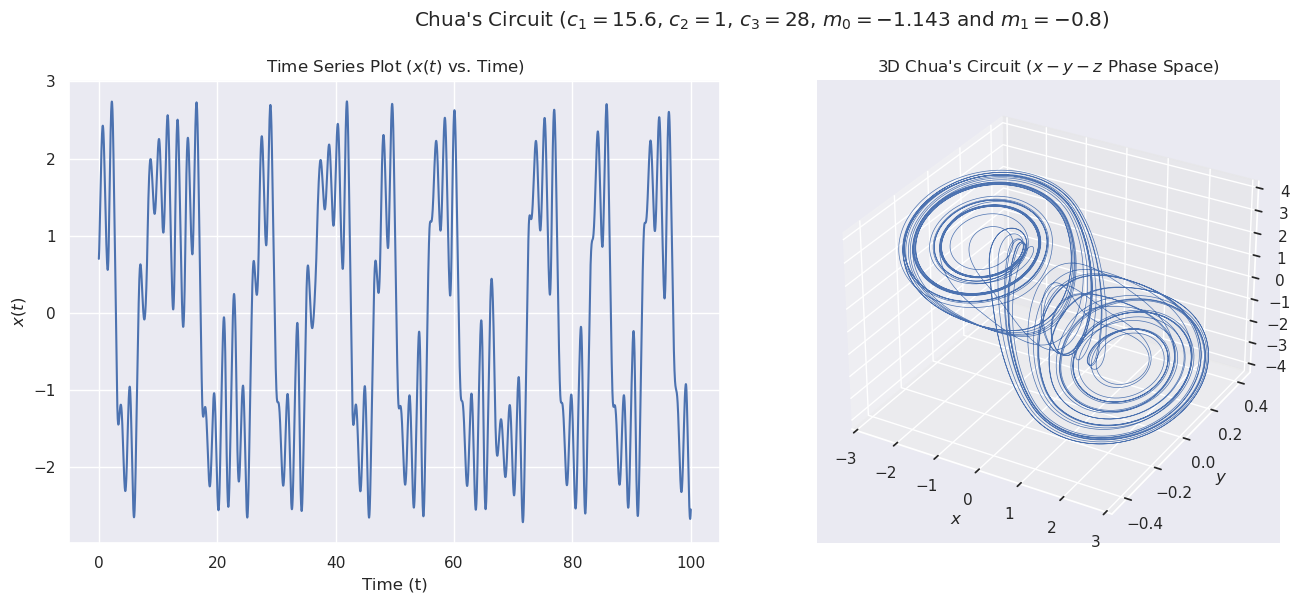

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D projection

# --- Define Parameters and Functions ---
c1 = 15.6
c2 = 1
c3 = 28
m0 = -1.143
m1 = -0.8

def func(m0,m1,y0):
    return m1*y0 + (m0-m1)*(np.abs(y0+1)-np.abs(y0-1))/2

def fs(x,yvals):
    y0, y1, y2 = yvals
    f0 = c1 *(y1-y0-func(m0, m1, y0))
    f1 = c2*(y0-y1+y2)
    f2 = -c3*y1
    return np.array([f0, f1, f2])

def rk4gen(fs,a,b,n,yinits):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    
    yvals = np.copy(yinits)
    
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

# --- Simulation Execution ---
a, b, n = 0, 100, 10000
yinits = np.array([0.7, 0., 0.])
xs, ys = rk4gen(fs,a,b,n,yinits)

# --- Plotting Section ---
# Create a single figure with 1 row and 2 columns (2 subplots)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.suptitle(fr"Lorenz Attractor Visualization ($\sigma$={sigma}, $\rho$={rho}, $\beta$={beta})", y=1.05)
fig.tight_layout(rect=[0, 0, 1, 0.98])

## 1. Time Series Plot (Left Subplot: axs[0])
axs[0].plot(xs, ys[:,0])
axs[0].set_title("Time Series Plot ($x(t)$ vs. Time)")
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel(r"$x(t)$") 

plt.close(fig) # Close the figure we created earlier
fig = plt.figure(figsize=(14, 6))

# Left subplot (1, 2, 1) -> Time Series
ax_ts = fig.add_subplot(1, 2, 1)
ax_ts.plot(xs, ys[:,0])
ax_ts.set_title("Time Series Plot ($x(t)$ vs. Time)")
ax_ts.set_xlabel("Time (t)")
ax_ts.set_ylabel(r"$x(t)$")

# Right subplot (1, 2, 2) -> 3D Plot
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the 3D trajectory (x, y, z)
ax_3d.plot(ys[:, 0], ys[:, 1], ys[:, 2], lw=0.5, color='C0') 

ax_3d.set_title("3D Chua's Circuit ($x-y-z$ Phase Space)")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")

# Final cosmetic touch
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"Chua's Circuit ($c_1 = {c1}$, $c_2 = {c2}$, $c_3 = {c3}$, $m_0 = {m0}$ and $m_1 = {m1}$)", x=0.55, y=1.)
plt.savefig("Nov19 Chua 6.png")
plt.show()